In [1]:
import Pkg; Pkg.add("StatsBase")
using Pkg
Pkg.add("BosonSampling")
using StatsBase
using LinearAlgebra;
using Pkg
Pkg.add("Plots")
using BosonSampling
using Plots



   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`


In [3]:
import Pkg;

#Pkg.add("BosonSampling")
using BosonSampling

#Pkg.add("StatsBase")
using StatsBase

#Pkg.add("Plots")
using Plots

#Pkg.add("InvertedIndices")
using InvertedIndices

#Pkg.add("Distances")
using Distances

#Pkg.add("Random")
using Random

#Pkg.add("Measures")
using Measures

#Pkg.add("LaTeXStrings")
using LaTeXStrings

In [4]:
using Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools


   Resolving package versions...
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Sanaa Sharma\.julia\environments\v1.9\Manifest.toml`


In [5]:
n = 2;m = 6;
b=1
my_interf = RandHaar(m);
mode_numbers = 1:m
#chooses binning strategy. b=1 for unbinned distribution

dmb=Int(trunc(m/b)) #number of bins
println(dmb)
fin_list = []
del_list = []
numinitstates=10

pdf=[]

for i in 1:(m/b)
    dum_list = zeros(Int64,m)    
    dum_pos = sample((mode_numbers)[Not(del_list)],b,replace=false)
    append!(del_list,dum_pos) 
    dum_list[dum_pos].=1
    push!(fin_list,dum_list)
end

if m%b!=0
    dum_list = zeros(Int64,m)
    dum_pos = sample((mode_numbers)[Not(del_list)],m%b,replace=false)
    append!(del_list,dum_pos)
    dum_list[dum_pos].=1
    push!(fin_list,dum_list)
end

#println(fin_list)

# Makes bins based on the basis set chosen in fin_list. Example:- if b=2, fin_list= [1,0,1,0,0,0], [0,1,0,0,0,1], [0,0,0,1,1,0], 
# subarrays will be ([1,3],[2,6],[4,5])

part=[]
part_subset=[]

for i in fin_list
    for j in 1:length(i)
        if i[j]==1
            part=push!(part,j)
           
        else 
            nothing
        end
    end  
end


num_subarrays = dmb

subarrays = []
chunk_size = div(length(part), dmb)

for i in 1:dmb
    start_index = (i - 1) * chunk_size + 1
    end_index = min(i * chunk_size, length(part))
    push!(subarrays, part[start_index:end_index])
end

#println(subarrays)




6


In [6]:
numsamples = 10 # number of samples (for total probability distribution, dmb=m and minimum number of samples=binomial(n+dmb-1,n))
numinitstates=10;

larger_dictionary = Dict{String, Any}() # large dictionary for results

dis = zeros(Real, numinitstates)
CPU_time = @time for j in 1:numinitstates # permuting over random input states
     #println(array_of_vectors)
     array_of_vectors = [Vector{Int64}(undef, 2) for _ in 1:numsamples]; 
    my_input = Input{Bosonic}(ModeOccupation(random_occupancy(n,m)));
       for i in 1:numsamples  # Clifford Sampler takes numsamples (Number of samples) for each randomized initial state
        res = cliffords_sampler(input=my_input, interf=my_interf)
       # println(res)
        array_of_vectors[i]= res
        #println("i", array_of_vectors)
    end
    
    #counter to bin the samples into bins defined above using subarrays
    counter = Vector{Vector{Int64}}(undef, numsamples)
      for i in 1:numsamples
        counter[i] = fill(0, dmb)
    end   
    
    for i in 1:length(array_of_vectors)
        for s in 1:length(array_of_vectors[i])     
            for l in 1:length(subarrays)
                for k in 1:length(subarrays[l])
                    if array_of_vectors[i][s]== subarrays[l][k]
                        counter[i][l]=counter[i][l] + 1
                    else
                        nothing
                    end            
                end
            end    
        end
    end
   
     #println(counter)
  
    converted = map(string, counter)
    #println(converted)
    counts = countmap(converted) #counting values for different initial states and adding to the larger_dictionary

    larger_dictionary["$j"] = counts
    #print(larger_dictionary)
  
end

#println("CPU time: $CPU_time seconds")



  1.695558 seconds (1.92 M allocations: 115.735 MiB, 2.10% gc time, 98.49% compilation time)


In [7]:
# Get the set of all labels present in the smaller dictionaries
all_labels = union(keys.(values(larger_dictionary))...)

# Check if all smaller dictionaries have the same labels
if length(all_labels) == 1
    println("All dictionaries have the same labels.")
else
    for (dict_key, inner_dict) in larger_dictionary
        missing_labels = setdiff(all_labels, keys(inner_dict))
        for label in missing_labels
            inner_dict[label] = 0  # Add the missing label with a default value of 0
        end
    end
end

# Print the updated larger dictionary
#println(larger_dictionary)


In [8]:


reference_dict = first(values(larger_dictionary)) # Using one permutation (out of numinitstates) as the reference
reference_keys = sort(collect(keys(reference_dict)))  # Extract the keys from one of the dictionaries as reference

#println(reference_dict)

12-element Vector{String}:
 "[0, 0, 0, 0, 2, 0]"
 "[0, 0, 0, 1, 1, 0]"
 "[0, 0, 0, 2, 0, 0]"
 "[0, 0, 1, 0, 0, 1]"
 "[0, 0, 1, 0, 1, 0]"
 "[0, 0, 1, 1, 0, 0]"
 "[0, 1, 0, 0, 0, 1]"
 "[0, 1, 0, 0, 1, 0]"
 "[0, 1, 0, 1, 0, 0]"
 "[0, 1, 1, 0, 0, 0]"
 "[0, 2, 0, 0, 0, 0]"
 "[1, 1, 0, 0, 0, 0]"

In [9]:


# Create new dictionaries with keys arranged in the desired order
new_dictionary = Dict{String, Dict{String, Int64}}()
for (dict_key, inner_dict) in larger_dictionary
    #println(dict_key)
    #println(inner_dict)
    sorted_inner_dict = Dict{String, Int64}()
    for key in reference_keys
        #println(key)
            sorted_inner_dict[key] = inner_dict[key]
            new_dictionary[dict_key] = sorted_inner_dict
        
    end
    #end
    
end


# println(new_dictionary)
# The new_dict will have dictionaries with keys arranged in the same order



In [10]:
difference = [] 
res = zeros(Float64, 1)


# Perform subtraction on the shared keys
for (key,inner_dict) in new_dictionary
    shared_keys= intersect(keys(reference_dict), keys(inner_dict))
           #println(shared_keys)
    result= []

     for keyy in shared_keys
       res = (new_dictionary[key][keyy] - reference_dict[keyy])/numsamples  # finding the DTV values of different numinitstates states
        #println(new_dictionary[key][keyy])
        #println(reference_dict[keyy])
        
        result = [result; res]
        #println(result)
      
   end
    
  #typeof(difference)
  difference = push!(difference, result)
   # println(difference)
    
end




In [11]:
new_result = zeros(Float64, numinitstates) 

for i in 1:length(difference)
    for j in 1:length(difference[i])
       # println(abs(result[i][j]))
        new_result[i] =0.5*( new_result[i] + abs(difference[i][j])) #adding absolute values
        
    end
end
#println(new_result)

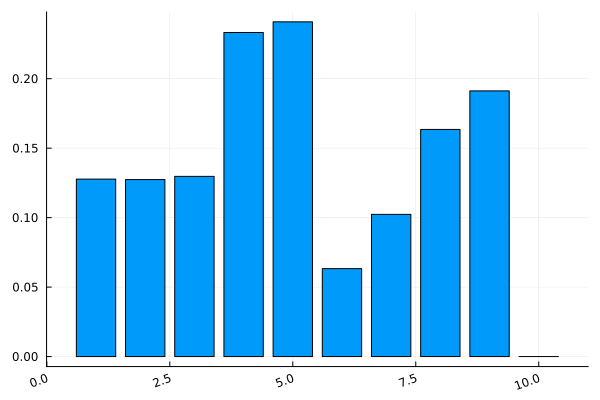

In [12]:

Plots.bar(new_result,label="Distance between different binning strategies", xrotation = 20, legend = false)



    

In [13]:
v=new_result/(numsamples)
v=sort(v,rev=true)


10-element Vector{Float64}:
 0.024091796875
 0.02332763671875
 0.01912353515625
 0.016347656250000002
 0.012971191406249999
 0.012773437500000002
 0.01274169921875
 0.01023681640625
 0.006328125000000001
 0.0

In [14]:
v = filter(x -> x != 0, v)
minimum(v)

0.006328125000000001

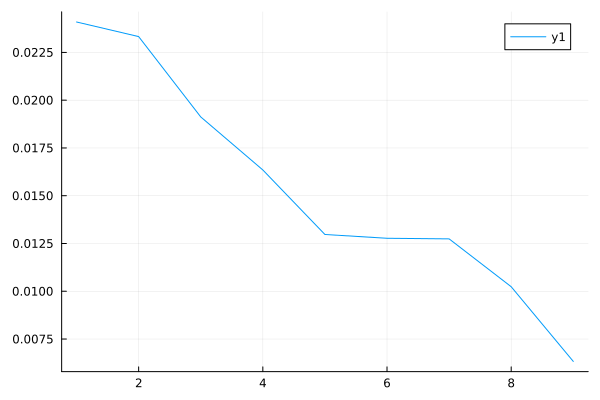

In [15]:
plot(v)

In [16]:
mean(v)

0.015326877170138885

In [17]:
maximum(v)

0.024091796875

In [18]:
# STATE-BINNING from the above probability distribution


# Writes all the values of dictionary (new_dictionary) in array (array_value)
array_value= []

for (key, inner_dict) in new_dictionary
    for (label, value) in inner_dict
        array_value = push!(array_value, value)
       
    end
end

length(array_value)

120

In [19]:
dsb =3

#Divides the array_value into numinitstates number of small arrays

new_subgroups = []
new_subgroup_size = Int(trunc(length(array_value)/numinitstates))   
for i in 1:numinitstates
    start_index = (i - 1) * new_subgroup_size + 1
    end_index = min(i * new_subgroup_size, length(array_value))
    push!(new_subgroups, array_value[start_index:end_index])
end



In [20]:
subgroup_size = dsb   

# Adds the values of in a particular bin size (dsb) and makes a new array (sum_array)

sum_array=[]
for i in 1:length(new_subgroups)
   
    for j in 1:Int(trunc(length(new_subgroups[i])/dsb))  
        start_index = (j - 1) * subgroup_size + 1
        end_index = min(j * subgroup_size, length(new_subgroups[i]))
        #println(new_subgroups[i][start_index:end_index])
        sum=0
        for k in 1:length(new_subgroups[i][start_index:end_index])
            sum = sum + new_subgroups[i][start_index:end_index][k]
        end
        sum_array= push!(sum_array,sum)
end
end

#println(sum_array)


In [21]:
sized = Int(trunc(length(sum_array)/numinitstates))   

# Divides the sum array into "numinitstates" number of smaller arrays

summed_array=[]
for i in 1:numinitstates
    start_index = (i - 1) * sized + 1
    end_index = min(i * sized, length(sum_array))
    push!(summed_array, sum_array[start_index:end_index])
end



In [22]:
dis = zeros(Real, numinitstates-1)

#Calculates the difference between binned distributions

for i in 1:numinitstates
    distance=0
    if i< numinitstates
      # println(state_binned_array[1])
       # println(state_binned_array[i])
        for j in 1:length(summed_array[i])
            distance= (summed_array[i+1][j] -summed_array[1][j])/numsamples
         
            #println(state_binned_array[i+1][j]) #-state_binned_array[1][j]
            dis[i]= 0.5*(dis[i] + abs(distance))
            
            
        end
    end
 end



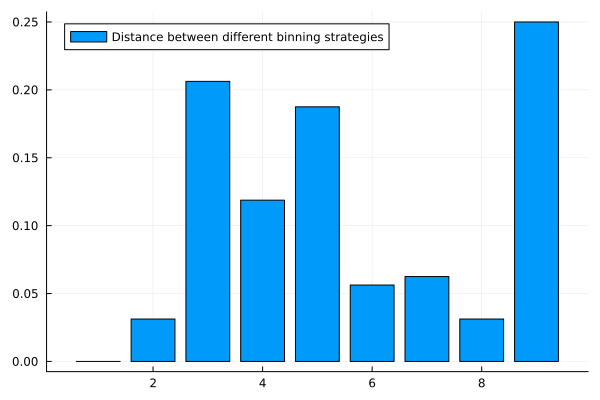

In [23]:
Plots.bar(dis,label="Distance between different binning strategies", )


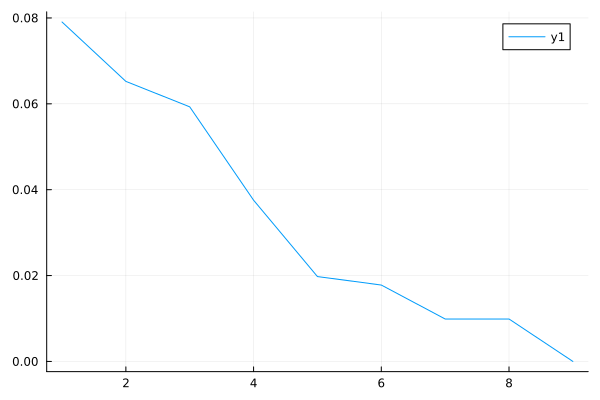

In [24]:
v = dis/sqrt(numsamples)
v=sort(v,rev=true)
plot(v)

In [25]:
v = filter(x -> x != 0, v)
minimum(v)

0.009882117688026186

In [26]:
maximum(v)

0.07905694150420949

In [27]:
mean(v)

0.037304994272298844

In [28]:
# MODE Binning

n = 2;m = 6;
b=2

my_interf = RandHaar(m);

#chooses binning strategy. b=1 for unbinned distribution

mode_numbers = 1:m


dmb=Int(trunc(m/b)) #number of bins
fin_list = []
del_list = []
numinitstates=10

pdf=[]

for i in 1:(m/b)
    dum_list = zeros(Int64,m)    
    dum_pos = sample((mode_numbers)[Not(del_list)],b,replace=false)
    append!(del_list,dum_pos) 
    dum_list[dum_pos].=1
    push!(fin_list,dum_list)
end

if m%b!=0
    dum_list = zeros(Int64,m)
    dum_pos = sample((mode_numbers)[Not(del_list)],m%b,replace=false)
    append!(del_list,dum_pos)
    dum_list[dum_pos].=1
    push!(fin_list,dum_list)
end


part=[]
part_subset=[]

for i in fin_list
    for j in 1:length(i)
        if i[j]==1
            part=push!(part,j)
           
        else 
            nothing
        end
    end  
end


num_subarrays = dmb

subarrays = []
chunk_size = div(length(part), dmb)

for i in 1:dmb
    start_index = (i - 1) * chunk_size + 1
    end_index = min(i * chunk_size, length(part))
    push!(subarrays, part[start_index:end_index])
end

println(subarrays)




Any[Any[2, 4], Any[5, 6], Any[1, 3]]


In [31]:

numsamples = 10 #number of samples (for total probability distribution, dmb=m and minimum number of samples=binomial(n+dmb-1,n))
numinitstates=10;

larger_dictionary = Dict{String, Any}() # large dictionary for results

dis = zeros(Real, numinitstates)
elapsed_time = @elapsed for j in 1:numinitstates # permuting over random input states
     #println(array_of_vectors)
     array_of_vectors = [Vector{Int64}(undef, 4) for _ in 1:numsamples]; 
    my_input = Input{Bosonic}(ModeOccupation(random_occupancy(n,m)));
       for i in 1:numsamples                                       # Clifford Sampler takes numsamples (Number of samples) for each randomized initial state
        res = cliffords_sampler(input=my_input, interf=my_interf)
       # println(res)
        array_of_vectors[i]= res
    end
    
    #counter to bin the samples into bins defined above using subarrays
    counter = Vector{Vector{Int64}}(undef, numsamples)
      for i in 1:numsamples
        counter[i] = fill(0, dmb)
    end   
    
    for i in 1:length(array_of_vectors)
        for s in 1:length(array_of_vectors[i])     
            for l in 1:length(subarrays)
                for k in 1:length(subarrays[l])
                    if array_of_vectors[i][s]== subarrays[l][k]
                        counter[i][l]=counter[i][l] + 1    
                    else
                        nothing
                    end            
                end
            end    
        end
    end
   
     # println(counter)
  
     converted = map(string, counter)
    counts = countmap(converted) #counting values for different initial states and adding to the larger_dictionary
    larger_dictionary["$j"] = counts 
    
end



reference_dict = first(values(larger_dictionary)) # Using one permutation (out of numinitstates) as the reference
reference_keys = sort(collect(keys(reference_dict)))  # Extract the keys from one of the dictionaries as reference


# Get the set of all labels present in the smaller dictionaries
all_labels = union(keys.(values(larger_dictionary))...)

# Check if all smaller dictionaries have the same labels
if length(all_labels) == 1
    println("All dictionaries have the same labels.")
else
    for (dict_key, inner_dict) in larger_dictionary
        missing_labels = setdiff(all_labels, keys(inner_dict))
        for label in missing_labels
            inner_dict[label] = 0  # Add the missing label with a default value of 0
        end
    end
end

# Print the updated larger dictionary
#println(larger_dictionary)



# Create new dictionaries with keys arranged in the desired order
new_dictionary = Dict{String, Dict{String, Int64}}()
for (dict_key, inner_dict) in larger_dictionary
    #println(dict_key)
    #println(inner_dict)
    sorted_inner_dict = Dict{String, Int64}()
    for key in reference_keys
        #println(key)
            sorted_inner_dict[key] = inner_dict[key]
            new_dictionary[dict_key] = sorted_inner_dict
        
    end
        
    #end
    
end
# println(new_dictionary)
# The new_dict will have dictionaries with keys arranged in the same order

difference = [] 
res = zeros(Float64, 1)


# Perform subtraction on the shared keys
for (key,inner_dict) in new_dictionary
    shared_keys= intersect(keys(reference_dict), keys(inner_dict))
           #println(shared_keys)
    result= []

     for keyy in shared_keys
       res = (new_dictionary[key][keyy] - reference_dict[keyy])/numsamples  # finding the DTV values of different numinitstates states
        #println(res)
        
        result = [result; res]
        #println(result)
      
   end
  #typeof(difference)
  difference = push!(difference, result)
 #   println(difference)
    
end

new_result = zeros(Float64, numinitstates) 

for i in 1:length(difference)
    for j in 1:length(difference[i])
       # println(abs(result[i][j]))
        new_result[i] = 0.5*(new_result[i] + abs(difference[i][j])) #adding absolute values
        
    end
end
#println(new_result)




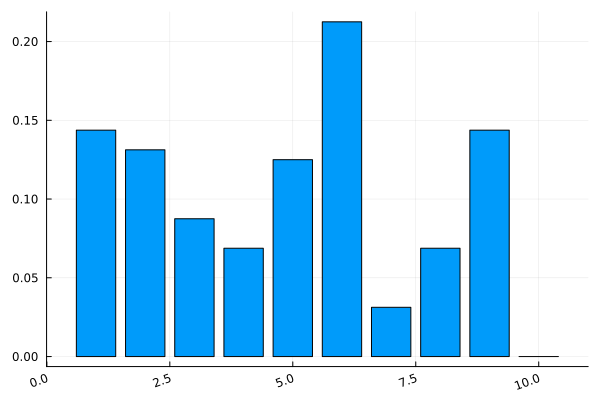

In [33]:

Plots.bar(new_result,label="Distance between different binning strategies", xrotation = 20, legend = false)



    


In [34]:
v= new_result/sqrt(numsamples)
v = filter(x -> x != 0, v)
minimum(v)

0.009882117688026186

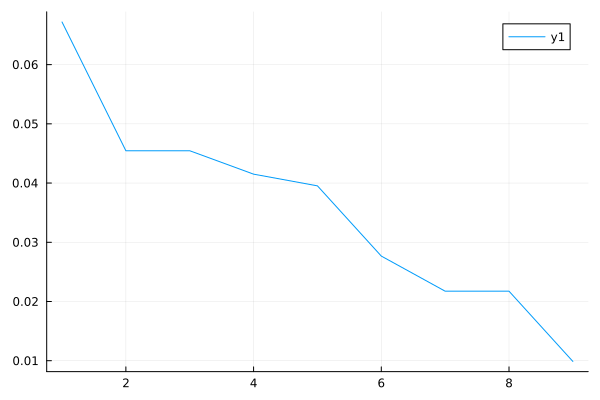

In [35]:
v=sort(v,rev=true)
plot(v)

In [36]:
maximum(v)


0.06719840027857807

In [37]:
mean(v)

0.035575623676894264